In [1]:
# Libraries
#---Pandas
import pandas as pd
from pandas.tools.plotting import scatter_matrix

#---numpy
import numpy as np

#---matplotlib
from matplotlib import pyplot as plt

In [19]:
# importing
xls = pd.ExcelFile("data/Data_Cortex_Nuclear.xls")
xls.sheet_names

[u'Hoja1']

In [20]:
# creating a dataframe
data = xls.parse("Hoja1")
len(data.index)

1080

In [21]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [22]:
# Finding all the missing values
for i in data.columns:
    if data[i].isnull().value_counts()[0] != 1080:
        print "{:10s} missing values: {} ".format(i,data[i].isnull().value_counts()[1])

DYRK1A_N   missing values: 3 
ITSN1_N    missing values: 3 
BDNF_N     missing values: 3 
NR1_N      missing values: 3 
NR2A_N     missing values: 3 
pAKT_N     missing values: 3 
pBRAF_N    missing values: 3 
pCAMKII_N  missing values: 3 
pCREB_N    missing values: 3 
pELK_N     missing values: 3 
pERK_N     missing values: 3 
pJNK_N     missing values: 3 
PKCA_N     missing values: 3 
pMEK_N     missing values: 3 
pNR1_N     missing values: 3 
pNR2A_N    missing values: 3 
pNR2B_N    missing values: 3 
pPKCAB_N   missing values: 3 
pRSK_N     missing values: 3 
AKT_N      missing values: 3 
BRAF_N     missing values: 3 
CAMKII_N   missing values: 3 
CREB_N     missing values: 3 
ELK_N      missing values: 18 
ERK_N      missing values: 3 
GSK3B_N    missing values: 3 
JNK_N      missing values: 3 
MEK_N      missing values: 7 
TRKA_N     missing values: 3 
RSK_N      missing values: 3 
APP_N      missing values: 3 
Bcatenin_N missing values: 18 
SOD1_N     missing values: 3 
MTOR_N  

### Dealing with missing values

In [26]:
# From DYRK1A_N - pP70S6_N, I believe that inputting the average would be best
# Then we can use these to help determine missing values of the ones that are missing more.

"""
Essentially waht I am doing.

for x in data.columns[1:44]:
    for i,row in data.loc[data[x].isnull(),:].iterrows():
        data[x][i] = data[x].mean()
"""

# looping over all the indicies with 18 or less missing values...
for x in data.columns[1:44]:
    #replacing null values with mean.
    data[x].fillna(data[x].mean(),inplace = True)

In [25]:
# Finding all the missing values
for i in data.columns:
    if data[i].isnull().value_counts()[0] != 1080:
        print "{:10s} missing values: {} ".format(i,data[i].isnull().value_counts()[1])

BAD_N      missing values: 213 
BCL2_N     missing values: 285 
pCFOS_N    missing values: 75 
H3AcK18_N  missing values: 180 
EGR1_N     missing values: 210 
H3MeK4_N   missing values: 270 


In [ ]:
"""

From our graphs notebook, we notice that one of the lowest expressed protiens was pBRAF_N.
The higest one was NR2A_N.
Therefore if we check the boxplots of all the leftover ones, we might see one worthwhile.


"""

/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


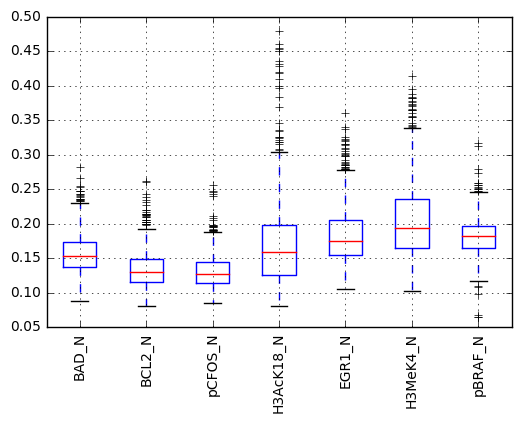

In [60]:
# Comparing with the lowest expressed pBRAF_N

data.boxplot(['BAD_N','BCL2_N','pCFOS_N','H3AcK18_N','EGR1_N','H3MeK4_N','pBRAF_N'],rot = 90)
plt.show()

/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


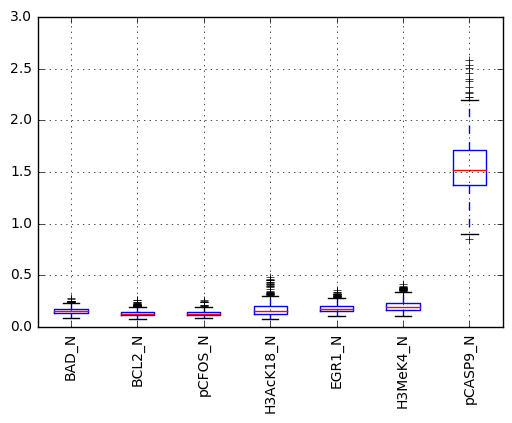

In [62]:
# Comparing with the lowest I am considering, pCASP9_N.

data.boxplot(['BAD_N','BCL2_N','pCFOS_N','H3AcK18_N','EGR1_N','H3MeK4_N','pCASP9_N'],rot = 90)
plt.show()

In [ ]:
"""

As it is looking, we don't have anything that is worth while and will probably ignore them.
Meaning the null values are instances where the mice had no expression.

"""

In [ ]:
#---machine learning
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB